<a href="https://colab.research.google.com/github/upwind1993/Numerical-Analysis/blob/main/15%EC%9E%A5/15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

15장 다항식 회귀분석

예제 15.1

In [ ]:
import numpy as np
X = np.matrix('6., 15., 55. ; 15., 55., 225. ; 55., 225., 979.')
const = np.matrix('152.6 ; 585.6 ; 2488.8')
b = np.linalg.solve(X,const)
np.set_printoptions(precision=4)
print('Estimated parameters are\n',b)

Estimated parameters are
 [[2.4786]
 [2.3593]
 [1.8607]]


15-2 다중선형회귀

15.1 예제를 참고하여 프로그램 작성하시오

예제

Saving H2SO4_VaporPressureData.csv to H2SO4_VaporPressureData.csv


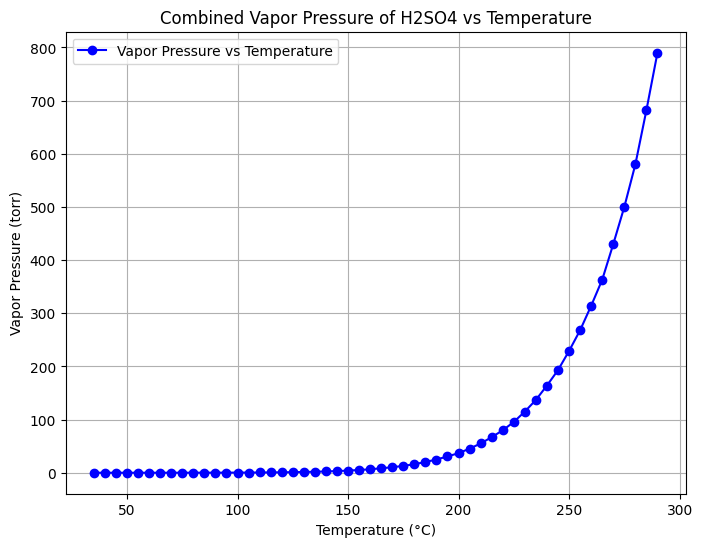

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files

# -----------------------------
# 1️⃣ CSV 업로드
# -----------------------------
uploaded = files.upload()  # ✅ dict 형태로 반환됨

# 업로드한 파일 이름 추출
filename = list(uploaded.keys())[0]

# pandas로 읽기
data = pd.read_csv(filename)

# -----------------------------
# 2️⃣ 열 이름 자동 탐색
# -----------------------------
temperature_columns = [col for col in data.columns if 'Temperature' in col]
vapor_pressure_columns = [col for col in data.columns if 'Vapor Pressure' in col]

# -----------------------------
# 3️⃣ 여러 열을 합쳐 하나의 배열로 생성
# -----------------------------
T = pd.concat([data[col] for col in temperature_columns], ignore_index=True).dropna()
VP = pd.concat([data[col] for col in vapor_pressure_columns], ignore_index=True).dropna()

# -----------------------------
# 4️⃣ 그래프 시각화
# -----------------------------
plt.figure(figsize=(8, 6))
plt.plot(T, VP, marker='o', linestyle='-', color='b', label='Vapor Pressure vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Vapor Pressure (torr)')
plt.title('Combined Vapor Pressure of H2SO4 vs Temperature')
plt.legend()
plt.grid(True)
plt.show()

Saving H2SO4_VaporPressureData.csv to H2SO4_VaporPressureData (2).csv


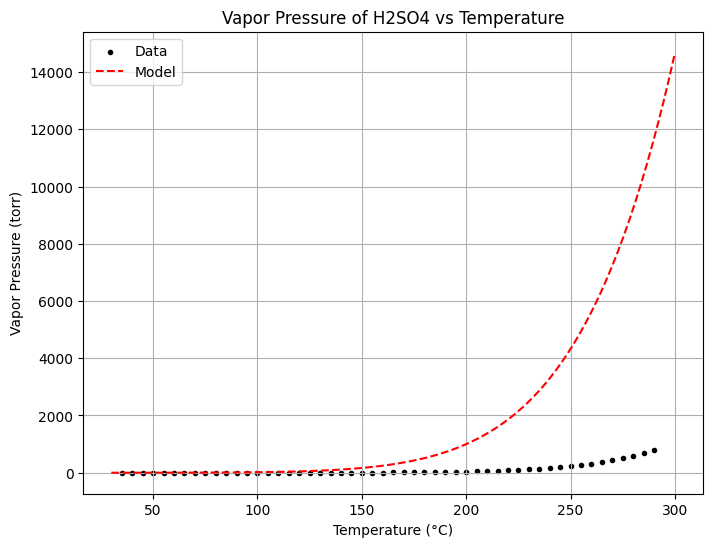

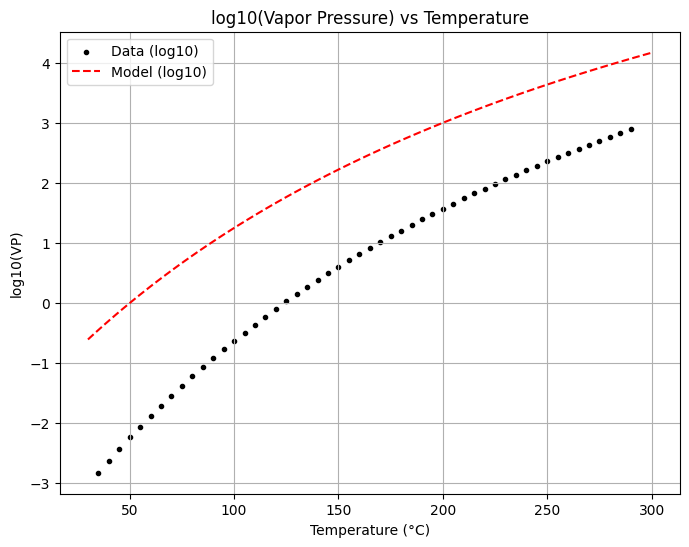

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files

# -----------------------------
# 1️⃣ CSV 업로드
# -----------------------------
uploaded = files.upload()  # 업로드 (딕셔너리 반환)
filename = list(uploaded.keys())[0]  # 파일 이름 추출
data = pd.read_csv(filename)         # CSV 읽기

# -----------------------------
# 2️⃣ 열 이름 추출 및 결합
# -----------------------------
temperature_columns = [col for col in data.columns if 'Temperature' in col]
vapor_pressure_columns = [col for col in data.columns if 'Vapor Pressure' in col]

T = pd.concat([data[col] for col in temperature_columns], ignore_index=True).dropna()
VP = pd.concat([data[col] for col in vapor_pressure_columns], ignore_index=True).dropna()

# -----------------------------
# 3️⃣ 모델식 초기값 설정
# -----------------------------
A = 10
B = 3500
C = 300

# 모델 곡선 계산
Tplot = np.linspace(30., 300., 100)
VPplot = 10**(A - B / (C + Tplot))

# -----------------------------
# 4️⃣ 1차 그래프: VP vs Temperature
# -----------------------------
plt.figure(figsize=(8, 6))
plt.scatter(T, VP, c='k', marker='.', label='Data')
plt.plot(Tplot, VPplot, c='r', linestyle='--', label='Model')
plt.grid(True)
plt.xlabel('Temperature (°C)')
plt.ylabel('Vapor Pressure (torr)')
plt.title('Vapor Pressure of H2SO4 vs Temperature')
plt.legend()
plt.show()

# -----------------------------
# 5️⃣ 2차 그래프: log10(VP) vs Temperature
# -----------------------------
logVP = np.log10(VP)
logVPplot = np.log10(VPplot)

plt.figure(figsize=(8, 6))
plt.scatter(T, logVP, c='k', marker='.', label='Data (log10)')
plt.plot(Tplot, logVPplot, c='r', linestyle='--', label='Model (log10)')
plt.grid(True)
plt.xlabel('Temperature (°C)')
plt.ylabel('log10(VP)')
plt.title('log10(Vapor Pressure) vs Temperature')
plt.legend()
plt.show()


Python Code for Nonlinear Regression - 1


Saving H2SO4_VaporPressureData.csv to H2SO4_VaporPressureData (5).csv
=== 최적화 결과 ===
A = 9.805640,  B = 3901.722714,  C = 273.928614
최소 SSE = 9.705402e-04


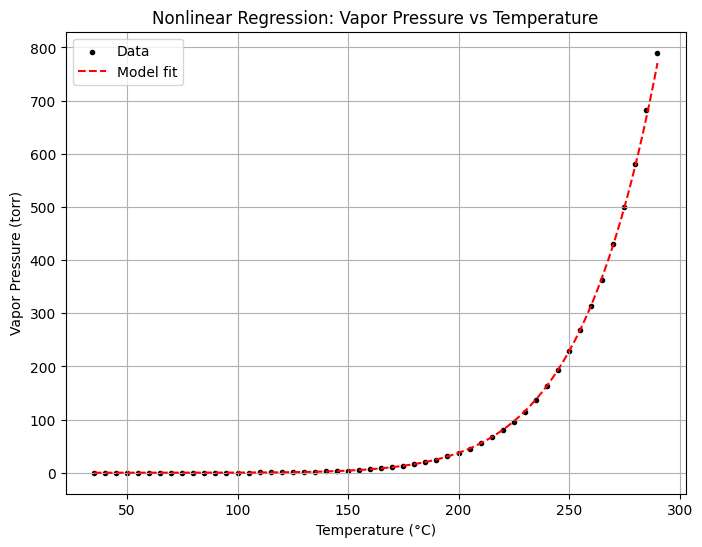

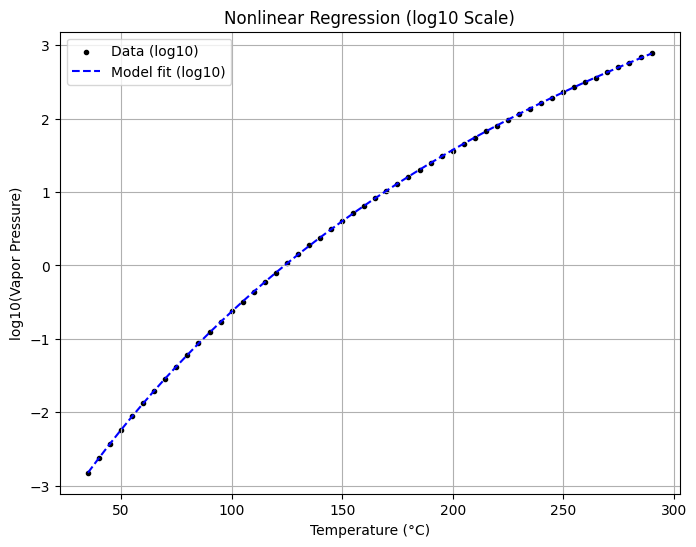

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
from scipy.optimize import minimize

# -----------------------------
# 1️⃣ CSV 업로드 및 데이터 읽기
# -----------------------------
uploaded = files.upload()  # CSV 파일 업로드
filename = list(uploaded.keys())[0]
data = pd.read_csv(filename)

# -----------------------------
# 2️⃣ 열 이름에서 온도와 증기압 추출
# -----------------------------
temperature_columns = [col for col in data.columns if 'Temperature' in col]
vapor_pressure_columns = [col for col in data.columns if 'Vapor Pressure' in col]

T = pd.concat([data[col] for col in temperature_columns], ignore_index=True).dropna().to_numpy()
VP = pd.concat([data[col] for col in vapor_pressure_columns], ignore_index=True).dropna().to_numpy()

# -----------------------------
# 3️⃣ 로그 변환
# -----------------------------
logVP = np.log10(VP)

# -----------------------------
# 4️⃣ SSE (오차제곱합) 함수 정의
# -----------------------------
def SSE(params):
    A, B, C = params
    logVP_pred = A - B / (C + T)
    e = logVP - logVP_pred
    return np.dot(e, e)

# -----------------------------
# 5️⃣ 초기값 설정 및 최소화
# -----------------------------
x0 = [10, 3500, 300]  # 초기 추정치
result = minimize(SSE, x0, method='BFGS')

A_hat, B_hat, C_hat = result.x

print("=== 최적화 결과 ===")
print(f"A = {A_hat:.6f},  B = {B_hat:.6f},  C = {C_hat:.6f}")
print(f"최소 SSE = {result.fun:.6e}")

# -----------------------------
# 6️⃣ 모델 예측
# -----------------------------
Tplot = np.linspace(min(T), max(T), 200)
VPplot = 10 ** (A_hat - B_hat / (C_hat + Tplot))
logVPplot = np.log10(VPplot)

# -----------------------------
# 7️⃣ 결과 시각화
# -----------------------------

# (1) 원래 단위: Vapor Pressure vs Temperature
plt.figure(figsize=(8, 6))
plt.scatter(T, VP, color='black', marker='.', label='Data')
plt.plot(Tplot, VPplot, color='red', linestyle='--', label='Model fit')
plt.grid(True)
plt.xlabel('Temperature (°C)')
plt.ylabel('Vapor Pressure (torr)')
plt.title('Nonlinear Regression: Vapor Pressure vs Temperature')
plt.legend()
plt.show()

# (2) 로그 스케일: log10(VP) vs Temperature
plt.figure(figsize=(8, 6))
plt.scatter(T, logVP, color='black', marker='.', label='Data (log10)')
plt.plot(Tplot, logVPplot, color='blue', linestyle='--', label='Model fit (log10)')
plt.grid(True)
plt.xlabel('Temperature (°C)')
plt.ylabel('log10(Vapor Pressure)')
plt.title('Nonlinear Regression (log10 Scale)')
plt.legend()
plt.show()



Python Code for Nonlinear Regression - 2

Saving H2SO4_VaporPressureData.csv to H2SO4_VaporPressureData (6).csv
최적화 결과:
A = 9.805640,  B = 3901.722714,  C = 273.928614
R² = 0.999993
표준오차 (Standard error) = 0.004450


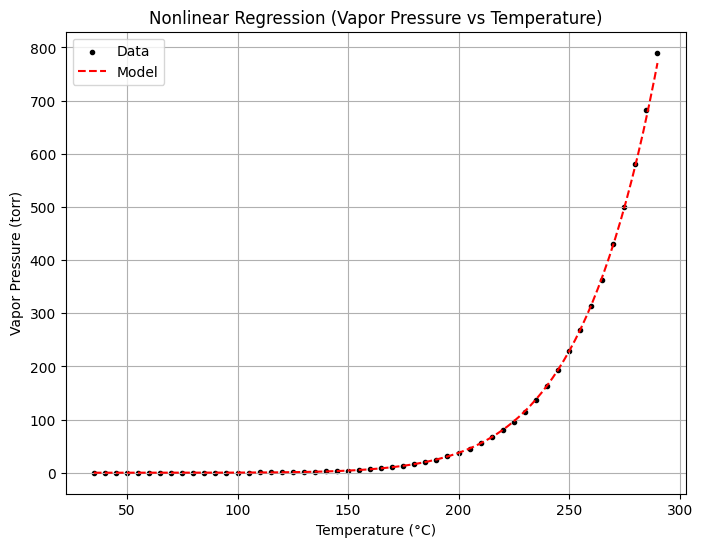

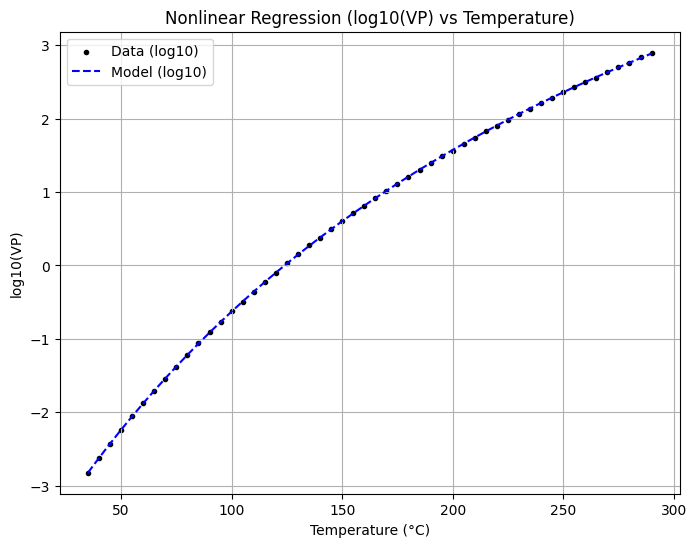

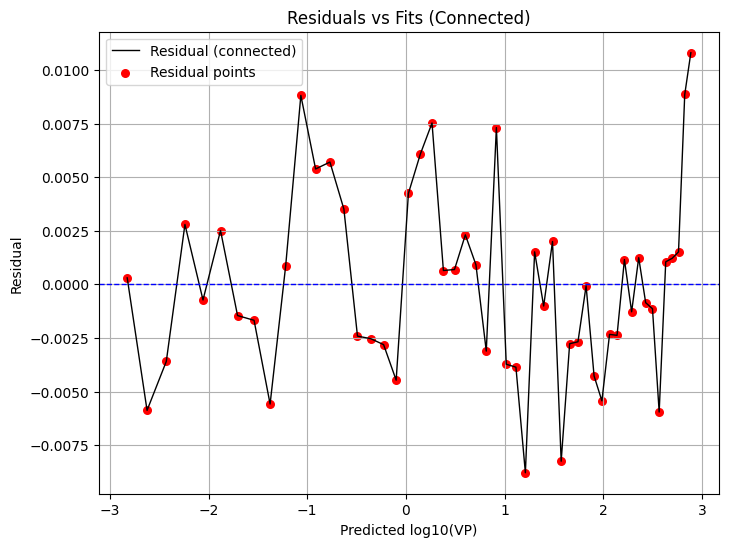

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
from scipy.optimize import minimize

# ==============================================
# 1️⃣ CSV 업로드 및 데이터 불러오기
# ==============================================
uploaded = files.upload()
filename = list(uploaded.keys())[0]
data = pd.read_csv(filename)

# 열 이름 자동 탐색 (Temperature, Vapor Pressure 포함)
temperature_columns = [col for col in data.columns if 'Temperature' in col]
vapor_pressure_columns = [col for col in data.columns if 'Vapor Pressure' in col]

T = pd.concat([data[col] for col in temperature_columns], ignore_index=True).dropna().to_numpy()
VP = pd.concat([data[col] for col in vapor_pressure_columns], ignore_index=True).dropna().to_numpy()

# ==============================================
# 2️⃣ 로그 변환
# ==============================================
logVP = np.log10(VP)

# ==============================================
# 3️⃣ SSE 함수 정의
# ==============================================
def SSE(params):
    A, B, C = params
    logVPpred = A - B / (C + T)
    e = logVP - logVPpred
    return np.dot(e, e)

# ==============================================
# 4️⃣ 초기값 및 최소화 (비선형 회귀)
# ==============================================
x0 = [10, 3500, 300]
result = minimize(SSE, x0, method='BFGS')
A, B, C = result.x
print("최적화 결과:")
print(f"A = {A:.6f},  B = {B:.6f},  C = {C:.6f}")

# ==============================================
# 5️⃣ 회귀 통계량 계산
# ==============================================
SSe = SSE(result.x)
n = len(T)
SST = np.var(logVP) * (n - 1)
R2 = 1 - SSe / SST
se = np.sqrt(SSe / (n - 3))
print(f"R² = {R2:.6f}")
print(f"표준오차 (Standard error) = {se:.6f}")

# ==============================================
# 6️⃣ 모델 예측
# ==============================================
logVPpred = A - B / (C + T)
VPpred = 10 ** logVPpred

# ==============================================
# 7️⃣ 그래프 ①: VP vs T (선형 스케일)
# ==============================================
plt.figure(figsize=(8, 6))
plt.scatter(T, VP, c='k', marker='.', label='Data')
Tplot = np.linspace(min(T), max(T), 200)
VPplot = 10 ** (A - B / (C + Tplot))
plt.plot(Tplot, VPplot, 'r--', label='Model')
plt.grid(True)
plt.xlabel('Temperature (°C)')
plt.ylabel('Vapor Pressure (torr)')
plt.title('Nonlinear Regression (Vapor Pressure vs Temperature)')
plt.legend()
plt.show()

# ==============================================
# 8️⃣ 그래프 ②: log10(VP) vs T
# ==============================================
plt.figure(figsize=(8, 6))
plt.scatter(T, logVP, c='k', marker='.', label='Data (log10)')
plt.plot(Tplot, A - B / (C + Tplot), 'b--', label='Model (log10)')
plt.grid(True)
plt.xlabel('Temperature (°C)')
plt.ylabel('log10(VP)')
plt.title('Nonlinear Regression (log10(VP) vs Temperature)')
plt.legend()
plt.show()

# ==============================================
# 9️⃣ 그래프 ③: 잔차(residuals)
# ==============================================
e = logVP - logVPpred

# 예측값(logVPpred)을 기준으로 정렬
order = np.argsort(logVPpred)
logVPpred_sorted = logVPpred[order]
e_sorted = e[order]

plt.figure(figsize=(8, 6))
plt.plot(logVPpred_sorted, e_sorted, 'k-', linewidth=1, label='Residual (connected)')
plt.scatter(logVPpred_sorted, e_sorted, c='r', s=30, label='Residual points')
plt.axhline(0, color='blue', linestyle='--', linewidth=1)
plt.grid(True)
plt.xlabel('Predicted log10(VP)')
plt.ylabel('Residual')
plt.title('Residuals vs Fits (Connected)')
plt.legend()
plt.show()


15.21  The data below have been collected, and a model has been proposed,  

Use nonlinear regression to fit this model to the data, and check adequacy of your model. Show plots of the data and the model line and the residuals versus the predicted  y values.

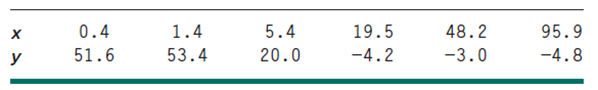

We will write a Python script using minimize from the SciPy optimize submodule.

최적화 결과:
  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 74.03657783016375
        x: [-4.852e+00  6.527e+01 -1.657e-01]
      nit: 21
      jac: [ 1.907e-06 -4.768e-06  7.629e-06]
 hess_inv: [[ 1.915e-01 -1.562e-01 -1.087e-03]
            [-1.562e-01  6.038e-01 -1.202e-03]
            [-1.087e-03 -1.202e-03  3.105e-05]]
     nfev: 146
     njev: 34
a = -4.852054, b = 65.265679, c = -0.165686


/usr/local/lib/python3.12/dist-packages/scipy/optimize/_numdiff.py:686: RuntimeWarning: invalid value encountered in subtract
  df = [f_eval - f0 for f_eval in f_evals]


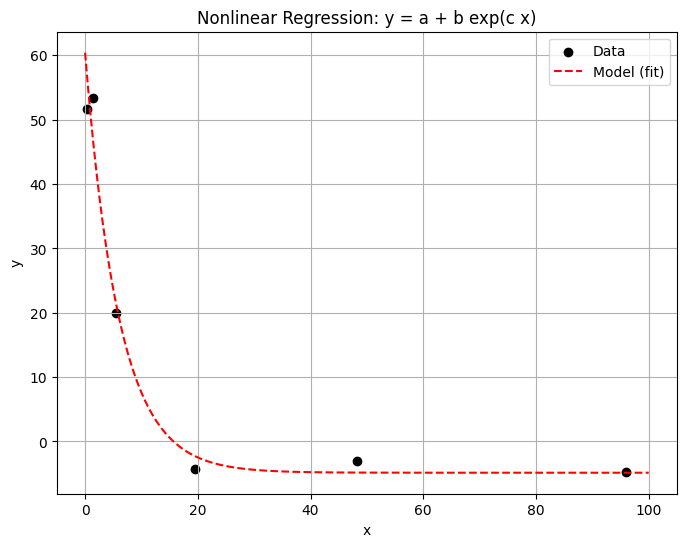

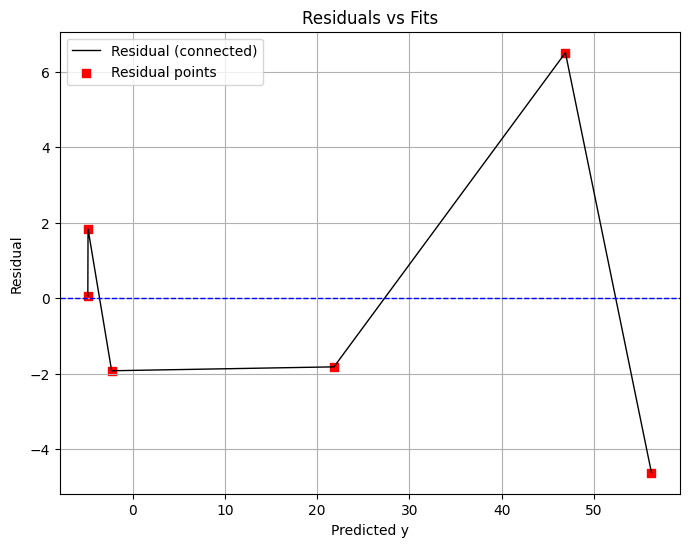

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# -----------------------------
# 1️⃣ 데이터
# -----------------------------
# 채우시오

# -----------------------------
# 2️⃣ SSE 함수 정의
# -----------------------------
# 작성하시오



# -----------------------------
# 3️⃣ 초기값 및 최소화
# -----------------------------
a0, b0, c0 = 2.0, 2.0, -2.0
result = minimize(SSE, [a0, b0, c0])
a, b, c = result.x

print("최적화 결과:")
print(result)
print(f"a = {a:.6f}, b = {b:.6f}, c = {c:.6f}")

# -----------------------------
# 4️⃣ 데이터 + 모델 곡선 시각화
# -----------------------------
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='black', label='Data')

# 모델 예측 곡선 (x 범위 0~100, 선 연결)
xplot = np.linspace(0, 100, 200)
yplot = a + b * np.exp(c * xplot)
plt.plot(xplot, yplot, color='red', linestyle='--', label='Model (fit)')

plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Nonlinear Regression: y = a + b exp(c x)')
plt.legend()
plt.show()

# -----------------------------
# 5️⃣ 잔차(residual) 분석
# -----------------------------
ypred = a + b * np.exp(c * x)
e = y - ypred

plt.figure(figsize=(8, 6))
# 예측값 순서대로 정렬해서 선으로 연결
order = np.argsort(ypred)
plt.plot(ypred[order], e[order], 'k-', linewidth=1, label='Residual (connected)')
plt.scatter(ypred, e, c='red', marker='s', label='Residual points')
plt.axhline(0, color='blue', linestyle='--', linewidth=1)
plt.grid(True)
plt.xlabel('Predicted y')
plt.ylabel('Residual')
plt.title('Residuals vs Fits')
plt.legend()
plt.show()
